> Code to accompany **Chapter 6: Methods for Generating Adversarial Perturbation**

# Fashion-MNIST Foolbox Gradient Attack

The Fast Gradient Sign Method (FSGM) calculates the direction in the input space which, at the location of the image, appears to be the fastest route to a misclassification. This direction is calculated using gradient descent and a cost function similar in principle to that for training a network.

The method was first proposaed by [Ian J. Goodfellow et al. in “Explaining and Harnessing Adversarial Examples,” (2015)](https://arxiv.org/abs/1412.6572).

This method was never intended to be a particularly effective way of creating adversarial examples. It does demonstrate an important feature of many deep networks, however.

The whole premise of the success of the FGSM assumes that the steepness of the slope in a particular direction will be maintained. Put in mathematical terminology, the function that the model represents exhibits *linear* behaviour. With linear models, it’s possible to vastly approximate the mathematics for generating adversarial perturbation by simply looking at local gradients. 

For a more detailed explanation of the FGSM, see chapter 6.

To begin, we import the required libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

## Get the previously saved Fashion-MNIST classifier model.


Firstly, get the model trained in chapter 3.
If you would like to see how this was trained, take a look at [the Jupyter notebook on GitHub](https://github.com/katywarr/strengthening-dnns/blob/master/chapter03/fashionMNIST_classifier.ipynb) or [train your own model by running it here](../chapter3/fashionMNIST_classifier.ipynb).


In [2]:
model = tf.keras.models.load_model("../models/fashionMNIST.h5")

Instructions for updating:
Colocations handled automatically by placer.


Run the test images through it.

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
_, (test_images, test_labels) = fashion_mnist.load_data()
test_images = test_images/255.0

predictions = model.predict(test_images)

## Select the original (non-adversarial) image

Select an original (nonadversarial image) and display it along with its prediction:


Prediction for original image: 6 Shirt


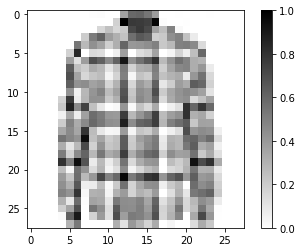

In [4]:
image_num = 7

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

x = test_images[image_num]
y = np.argmax(predictions[image_num])
y_name = class_names[y]

print("Prediction for original image:", y, y_name) 

plt.imshow(x, cmap=plt.cm.binary)
plt.colorbar()


## Get a Foolbox model from our Keras one

Create a Foolbox model from our Keras one. 

In [5]:
import foolbox
from foolbox.models import KerasModel
fmodel = foolbox.models.TensorFlowModel.from_keras(model, bounds=(0, 255))

## Define the attack specificity

The [foolbox.criteria](https://foolbox.readthedocs.io/en/latest/modules/criteria.html) defines the attack specificity (targeted versus untargeted) and the probability threshold required. In this case, we will do a simple misclassification.

The perturbation distance will be optimised according to the $L^{\infty}$-norm.
 

In [6]:
attack_criterion = foolbox.criteria.Misclassification()
distance = foolbox.distances.Linfinity

## Define the attack 

This is done by passing the foolbox `model`, the attack `criterion` and the `distance` measurement as parameters to create an instance of `foolbox.attacks.GradientSignAttack`.

See [the Foolbox docs here](https://foolbox.readthedocs.io/en/latest/modules/attacks/gradient.html#foolbox.attacks.GradientSignAttack).


In [7]:
attack = foolbox.attacks.GradientSignAttack(fmodel, criterion=attack_criterion, distance=distance)

## Run the attack

In [8]:
x_adv = attack(input_or_adv = x, label = y, unpack = False)

If the attack was successful, the images should be different. Take a look to see whether this is the case.

normalized Linf distance = 1.50e-04


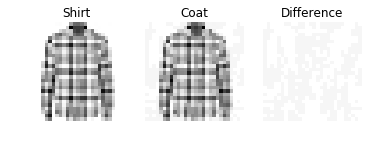

In [11]:
if ((x_adv is None) or (np.array_equal(x, x_adv.image))):
    print("No adversarial example was found")
else:   
    preds = model.predict(np.array([x_adv.image]))

    plt.figure()

    # Plot the original image
    plt.subplot(1, 3, 1)
    plt.title(y_name)
    plt.imshow(x, cmap=plt.cm.binary)
    plt.axis('off')

    # Plot the adversarial image
    plt.subplot(1, 3, 2)
    plt.title(class_names[np.argmax(preds[0])])
    plt.imshow(x_adv.image, cmap=plt.cm.binary)
    plt.axis('off')

    # Plot the difference
    plt.subplot(1, 3, 3)
    plt.title('Difference')
    difference = x_adv.image - x
    plt.imshow(difference, vmin=0, vmax=1, cmap=plt.cm.binary)
    plt.axis('off')

    print(x_adv.distance)

    plt.show()


## Where next?

Take a look at at other attacks. For example:

* The Foolbox boundary attack (black-box). Here's the [Jupyter notebook on GitHub](https://github.com/katywarr/strengthening-dnns/blob/master/chapter06/fashionMNIST_foolbox_boundary.ipynb) and here's the [relative path to the Jypyter notebook](./fashionMNIST_foolbox_boundary.ipynb) if you want to run it.

* The Foolbox saliency attack using the ResNet50 classifier. Here's the [Jupyter notebook on GitHub](https://github.com/katywarr/strengthening-dnns/blob/master/chapter06/resnet50_naive.ipynb) and here's the [relative path to the Jypyter notebook](./resnet50_naive.ipynb) if you want to run it.

There are many more examples of adversarial attacks online. See [RESOURCES.md](https://github.com/katywarr/strengthening-dnns/blob/master/RESOURCES.md) for links to collaborative projects for creating and defending against attacks.